imports

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [93]:
df  = pd.read_csv('Mall_Customers.csv')

In [94]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [95]:
df.isnull().sum()


CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<Axes: >

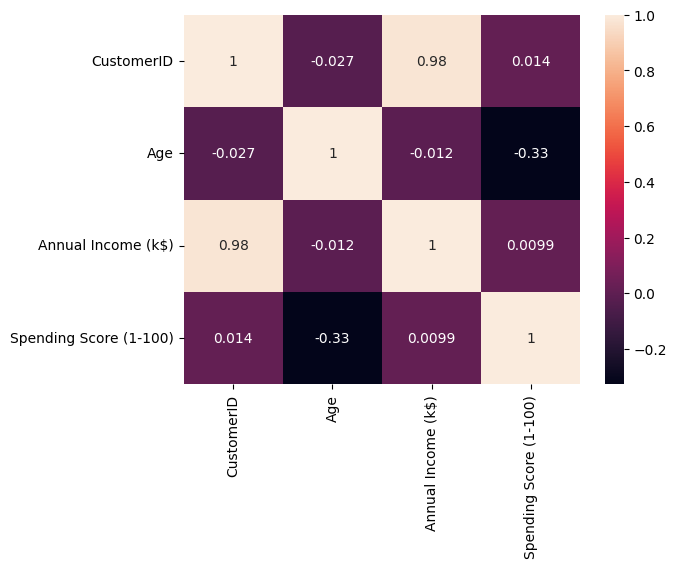

In [96]:
dr = df.drop(['Genre'],axis=1).corr()
sns.heatmap(dr, annot=True, )

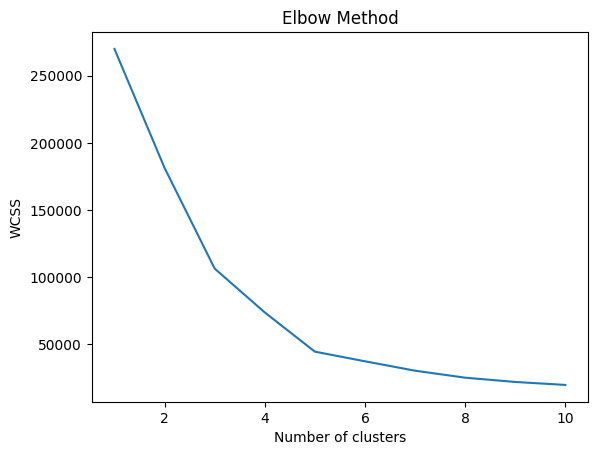

In [97]:
# classify the data into clusters on basis of # annual income and spending score
from sklearn.cluster import KMeans
X = df.iloc[:, [3, 4]].values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


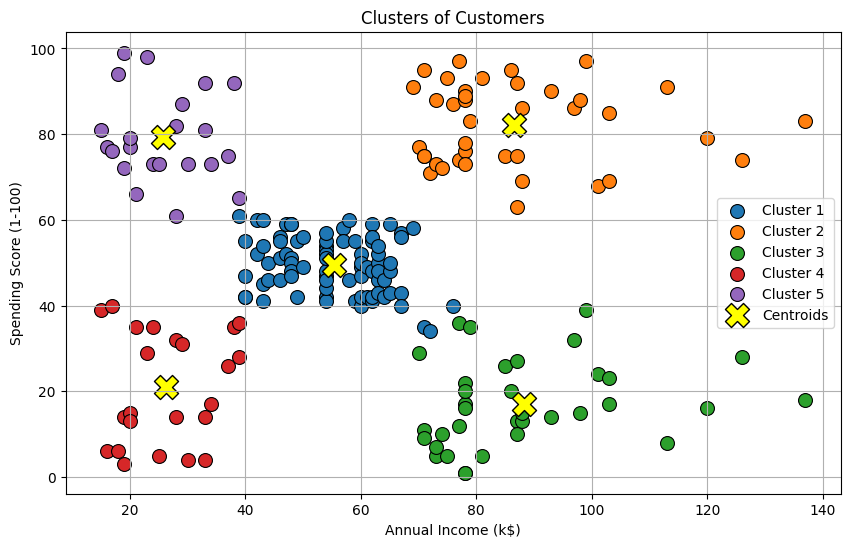

In [98]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)
plt.figure(figsize=(10, 6))
#plot the clusters using scatter plot in loop label each cluster with different color


for i in range(5):
     sns.scatterplot(x=X[y_kmeans == i, 0], y=X[y_kmeans == i, 1], label=f'Cluster {i+1}', s=100,marker ='o',edgecolor='black') 
        
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids',marker='X', edgecolors='black')
plt.grid()

plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()


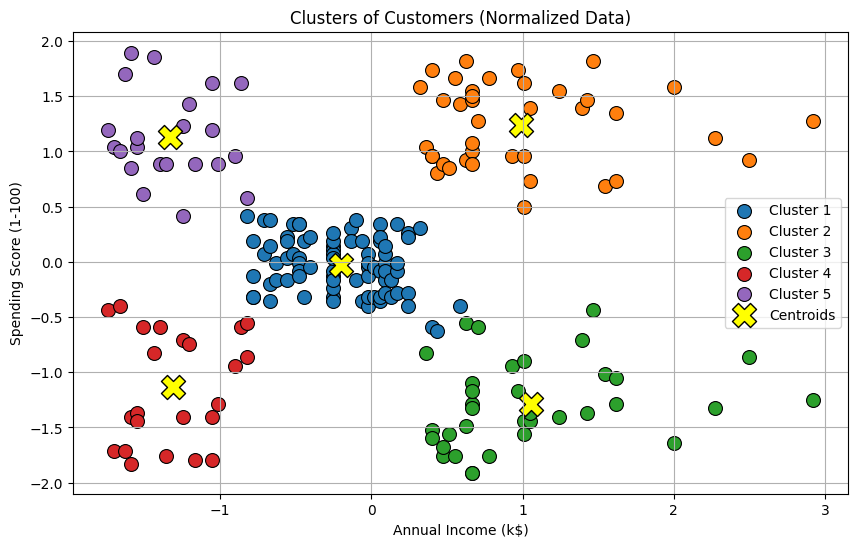

In [99]:
#Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Apply KMeans on normalized data
kmeans_scaled = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans_scaled = kmeans_scaled.fit_predict(X_scaled)
plt.figure(figsize=(10, 6))
# Plot the clusters using scatter plot in loop label each cluster with different color
for i in range(5):
    sns.scatterplot(x=X_scaled[y_kmeans_scaled == i, 0], y=X_scaled[y_kmeans_scaled == i, 1], label=f'Cluster {i+1}', s=100, marker='o', edgecolor='black')
plt.scatter(kmeans_scaled.cluster_centers_[:, 0], kmeans_scaled.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids', marker='X', edgecolors='black')
plt.grid()
plt.title('Clusters of Customers (Normalized Data)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()


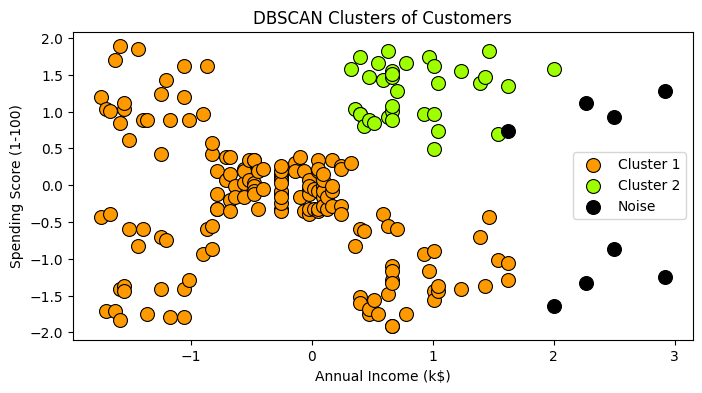

In [100]:
#  plot dbscan clusters
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_dbscan = dbscan.fit_predict(X_scaled)
plt.figure(figsize=(8, 4))
# Plot the clusters using scatter plot in loop label each cluster with different color
unique_labels = set(y_dbscan)
for label in unique_labels:
    if label == -1:  # Noise points
        color = 'black'
    else:
        color = sns.color_palette('gist_rainbow')[label % 10]  # Cycle through pastel colors
    sns.scatterplot(x=X_scaled[y_dbscan == label, 0], y=X_scaled[y_dbscan == label, 1], label=f'Cluster {label+1}' if label != -1 else 'Noise', s=100, marker='o', edgecolor='black', color=color)
plt.title('DBSCAN Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()




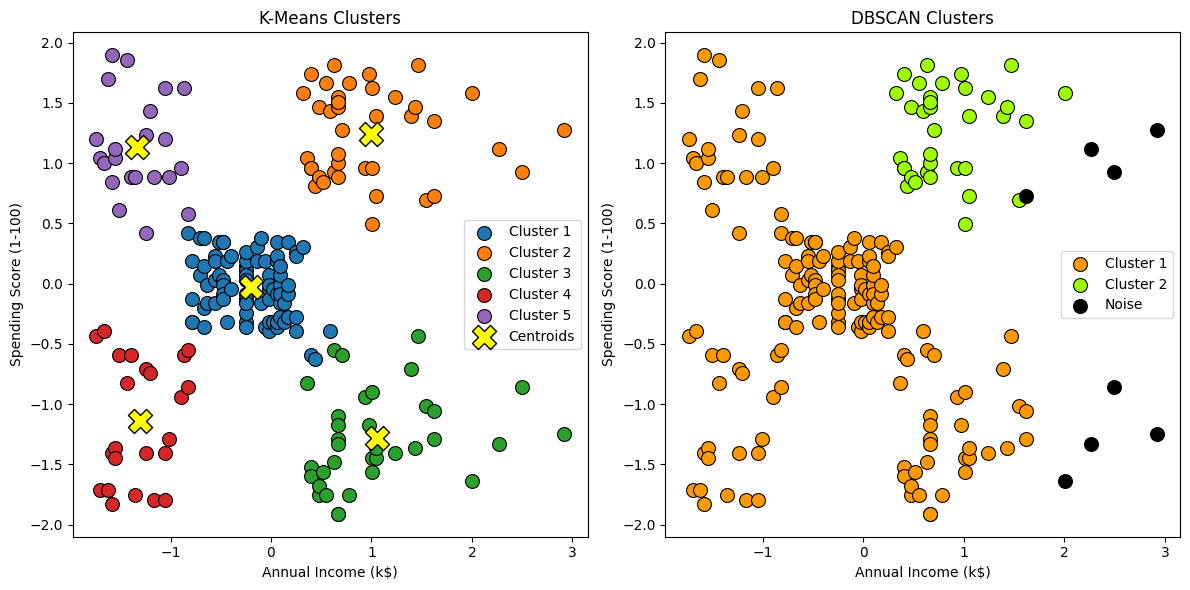

In [101]:
# Compare DBSCAN results with K-Means
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('K-Means Clusters')
for i in range(5):
    sns.scatterplot(x=X_scaled[y_kmeans_scaled == i, 0], y=X_scaled[y_kmeans_scaled == i, 1], label=f'Cluster {i+1}', s=100, marker='o', edgecolor='black')
plt.scatter(kmeans_scaled.cluster_centers_[:, 0], kmeans_scaled.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids', marker='X', edgecolors='black')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.subplot(1, 2, 2)
plt.title('DBSCAN Clusters')
unique_labels = set(y_dbscan)
for label in unique_labels:
    if label == -1:  # Noise points
        color = 'black'
    else:
        color = sns.color_palette('gist_rainbow')[label % 10]  # Cycle through pastel colors
    sns.scatterplot(x=X_scaled[y_dbscan == label, 0], y=X_scaled[y_dbscan == label, 1], label=f'Cluster {label+1}' if label != -1 else 'Noise', s=100, marker='o', edgecolor='black', color=color)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.tight_layout()


BIC: 1058.6522524191894,
 AIC: 963.0010487892964


<Figure size 1000x600 with 0 Axes>

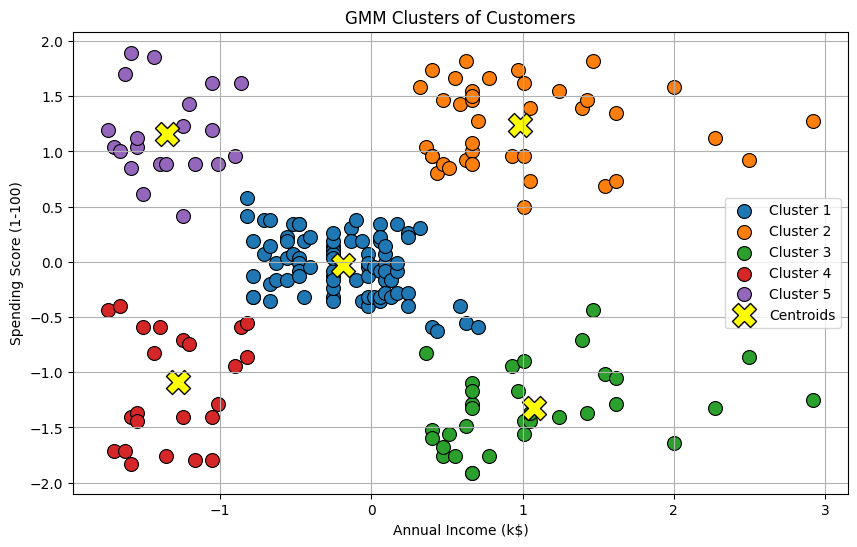

In [102]:
#Use GMM to probabilistically assign customers to clusters
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5, random_state=0)
gmm.fit(X_scaled)
y_gmm = gmm.predict(X_scaled)
plt.figure(figsize=(10, 6))

# Determine the optimal number of components using BIC/AIC
bic = gmm.bic(X_scaled)
aic = gmm.aic(X_scaled)
print(f'BIC: {bic},\n AIC: {aic}')
# Plot GMM clusters
plt.figure(figsize=(10, 6))
# Plot the clusters using scatter plot in loop label each cluster with different color

for i in range(5):
    sns.scatterplot(x=X_scaled[y_gmm == i, 0], y=X_scaled[y_gmm == i, 1], label=f'Cluster {i+1}', s=100, marker='o', edgecolor='black')
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], s=300, c='yellow', label='Centroids', marker='X', edgecolors='black')
plt.grid()
plt.title('GMM Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend();


K-Means Cluster Assignments:
[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]

DBSCAN Cluster Assignments:
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1
  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1
  0  1  0  1  0  1  0  1

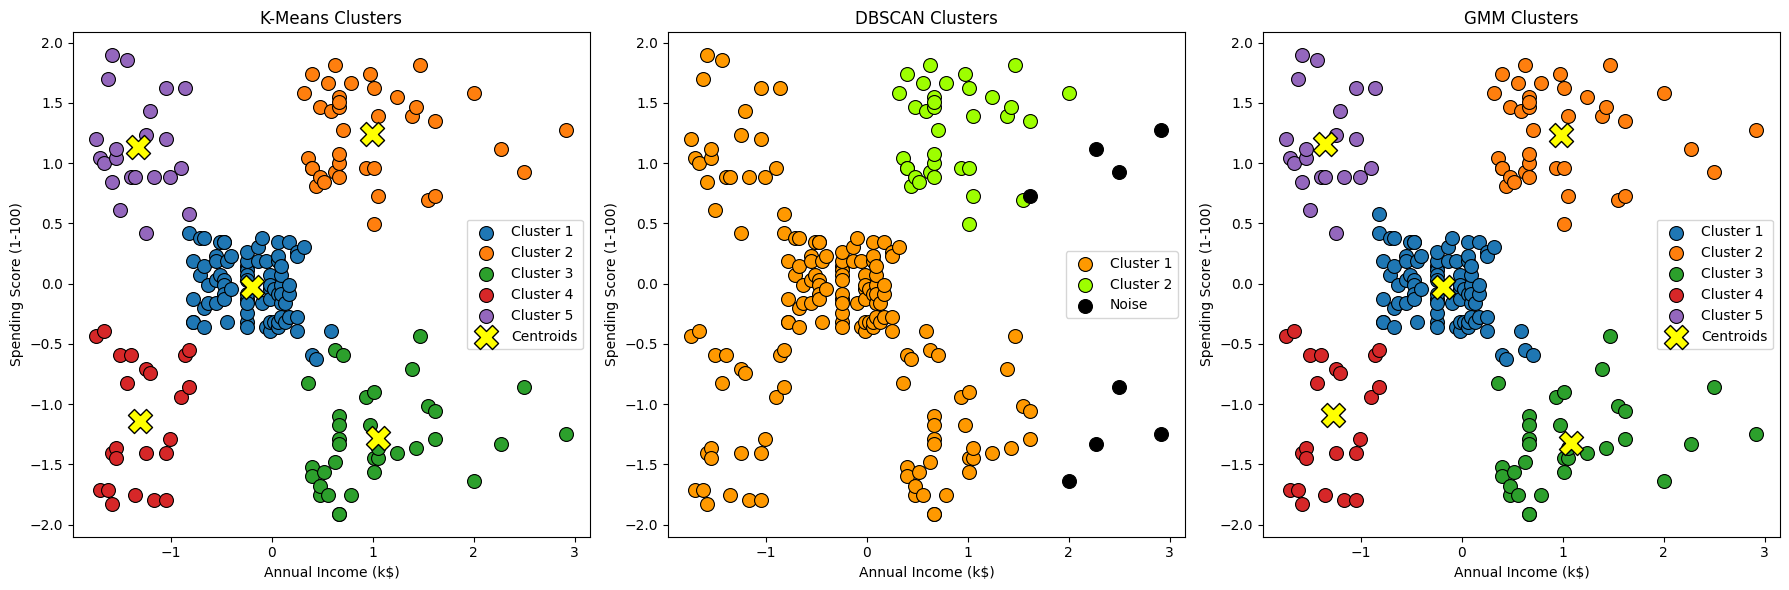

In [103]:
# Compare GMM results with K-Means and DBSCAN
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.title('K-Means Clusters')
for i in range(5):
    sns.scatterplot(x=X_scaled[y_kmeans_scaled == i, 0], y=X_scaled[y_kmeans_scaled == i, 1], label=f'Cluster {i+1}', s=100, marker='o', edgecolor='black')
plt.scatter(kmeans_scaled.cluster_centers_[:, 0], kmeans_scaled.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids', marker='X', edgecolors='black')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.subplot(1, 3, 2)
plt.title('DBSCAN Clusters')
unique_labels = set(y_dbscan)
for label in unique_labels:
    if label == -1:  # Noise points
        color = 'black'
    else:
        color = sns.color_palette('gist_rainbow')[label % 10]  # Cycle through pastel colors
    sns.scatterplot(x=X_scaled[y_dbscan == label, 0], y=X_scaled[y_dbscan == label, 1], label=f'Cluster {label+1}' if label != -1 else 'Noise', s=100, marker='o', edgecolor='black', color=color)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.subplot(1, 3, 3)
plt.title('GMM Clusters')
for i in range(5):
    sns.scatterplot(x=X_scaled[y_gmm == i, 0], y=X_scaled[y_gmm == i, 1], label=f'Cluster {i+1}', s=100, marker='o', edgecolor='black')
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], s=300, c='yellow', label='Centroids', marker='X', edgecolors='black')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.tight_layout()
# Print the cluster assignments for each method
print("K-Means Cluster Assignments:")
print(y_kmeans_scaled)
print("\nDBSCAN Cluster Assignments:")
print(y_dbscan)
print("\nGMM Cluster Assignments:")
print(y_gmm)
plt.show()


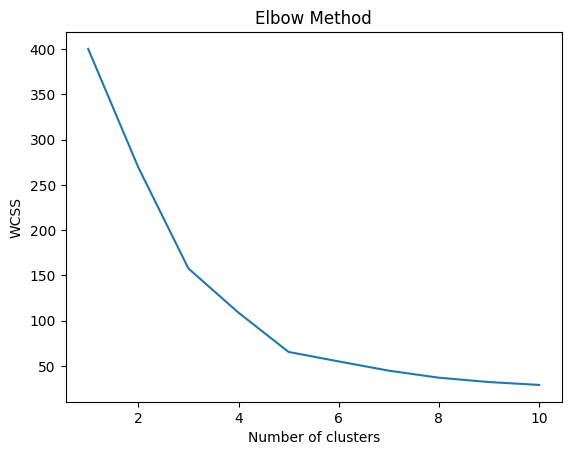

In [104]:
 # Reduce feature dimensionality using PCA and apply clustering 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


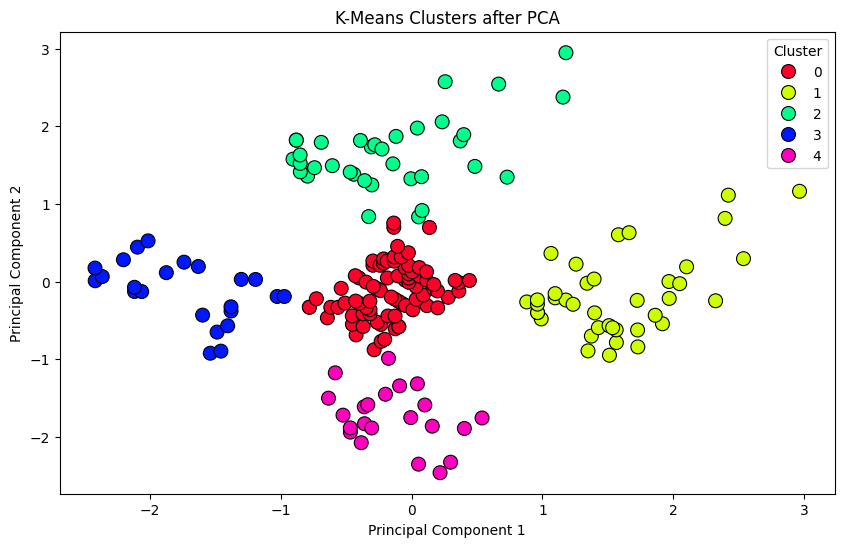

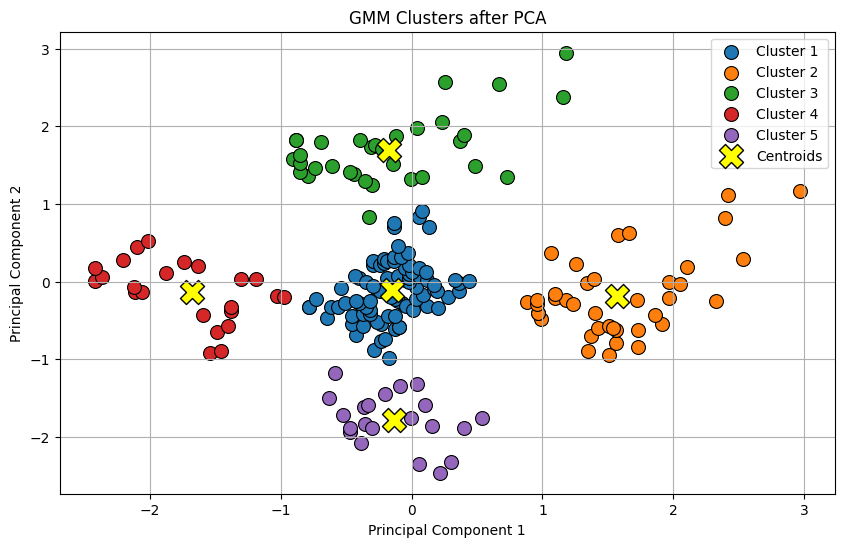

In [105]:
kmeans_scaled_pca = KMeans(n_clusters =5 ,init ='k-means++', max_iter=300, n_init=10, random_state=0)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_scaled_pca.fit_predict(X_pca), palette='gist_rainbow', s=100, edgecolor='black')
plt.title('K-Means Clusters after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
# apply GMM on PCA reduced data
gmm_pca = GaussianMixture(n_components=5, random_state=0)
gmm_pca.fit(X_pca)
y_gmm_pca = gmm_pca.predict(X_pca)
plt.figure(figsize=(10, 6))
# Plot the clusters using scatter plot in loop label each cluster with different color
for i in range(5):
    sns.scatterplot(x=X_pca[y_gmm_pca == i, 0], y=X_pca[y_gmm_pca == i, 1], label=f'Cluster {i+1}', s=100, marker='o', edgecolor='black')
plt.scatter(gmm_pca.means_[:, 0], gmm_pca.means_[:, 1], s=300, c='yellow', label='Centroids', marker='X', edgecolors='black')
plt.grid()
plt.title('GMM Clusters after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()


K-Means Cluster Assignments after PCA:
[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]

GMM Cluster Assignments after PCA:
[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 0 1
 2 1 2 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


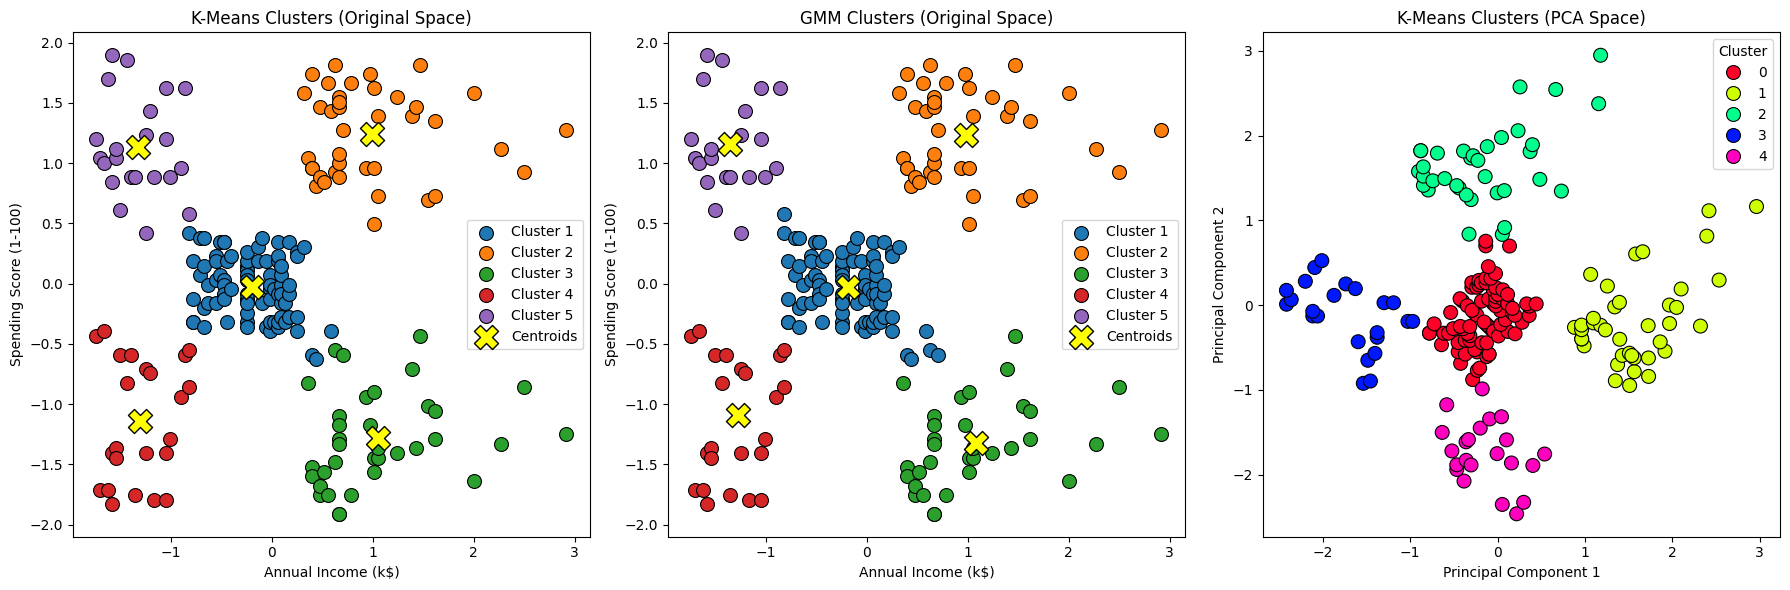

In [106]:
#Compare results with the original feature space clustering
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.title('K-Means Clusters (Original Space)')
for i in range(5):
    sns.scatterplot(x=X_scaled[y_kmeans_scaled == i, 0], y=X_scaled[y_kmeans_scaled == i, 1], label=f'Cluster {i+1}', s=100, marker='o', edgecolor='black')
plt.scatter(kmeans_scaled.cluster_centers_[:, 0], kmeans_scaled.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids', marker='X', edgecolors='black')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.subplot(1, 3, 2)
plt.title('GMM Clusters (Original Space)')
for i in range(5):
    sns.scatterplot(x=X_scaled[y_gmm == i, 0], y=X_scaled[y_gmm == i, 1], label=f'Cluster {i+1}', s=100, marker='o', edgecolor='black')
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], s=300, c='yellow', label='Centroids', marker='X', edgecolors='black')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.subplot(1, 3, 3)
plt.title('K-Means Clusters (PCA Space)')
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_scaled_pca.fit_predict(X_pca), palette='gist_rainbow', s=100, edgecolor='black')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.tight_layout()
# Print the cluster assignments for K-Means and GMM after PCA
print("\nK-Means Cluster Assignments after PCA:")
print(kmeans_scaled_pca.fit_predict(X_pca))
print("\nGMM Cluster Assignments after PCA:")
print(y_gmm_pca)
plt.show()
